In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# ODEV 1
#Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?



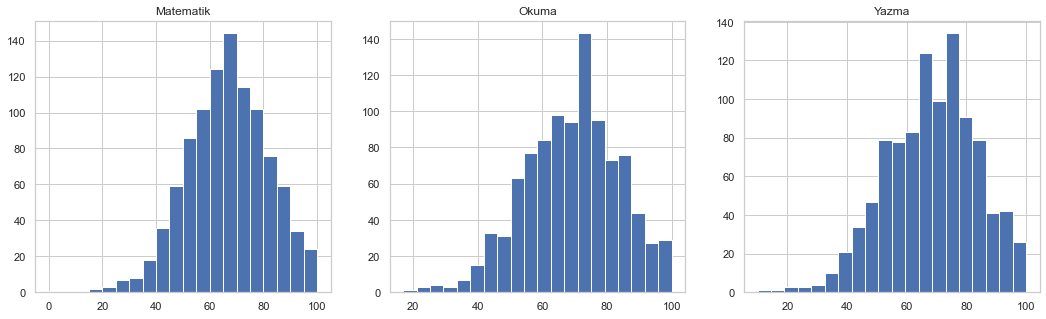

In [7]:
plt.figure(figsize = (18,5))

plt.subplot(1,3,1)
plt.hist(data['math score'], bins = 20)
plt.title('Matematik')

plt.subplot(1,3,2)
plt.hist(data['reading score'], bins = 20)
plt.title('Okuma')

plt.subplot(1,3,3)
plt.hist(data['writing score'], bins = 20)
plt.title('Yazma')

plt.show()

Normal dagılıma yakın gorunuyor fakat bunu test etmek için jarque_bera ve normaltest uygulayalım



In [14]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(data[ozellik])
    norm_stats = normaltest(data[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,15.91226,0.00035,15.40896,0.00045
1,reading score,11.38330,0.00337,11.11741,0.00385
2,writing score,13.98509,0.00092,13.60645,0.00111


In [15]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(data[ozellik]))
    norm_stats = normaltest(np.log(data[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,nan,nan,nan,nan
1,reading score,495.12732,0.00000,209.77151,0.00000
2,writing score,1410.93701,0.00000,318.96921,0.00000


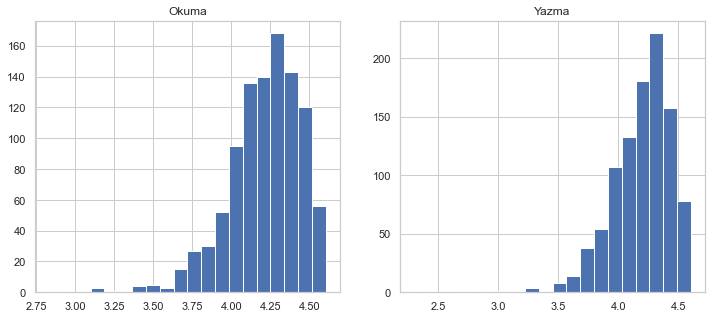

In [17]:
plt.figure(figsize = (12,5))


plt.subplot(1,2,1)
plt.hist(np.log(data['reading score']), bins = 20)
plt.title('Okuma')

plt.subplot(1,2,2)
plt.hist(np.log(data['writing score']), bins = 20)
plt.title('Yazma')

plt.show()

In [40]:
x = data[data['math score'] == 0]
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [39]:
data.loc[data['math score'] == 0, 'math score'] = data['math score'].mean()
data['math score'][59]

66.089

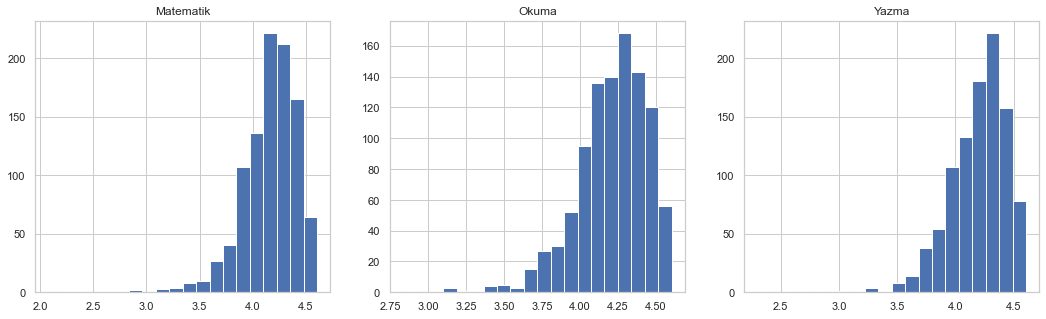

In [41]:
plt.figure(figsize = (18,5))


plt.subplot(1,3,1)
plt.hist(np.log(data['math score']), bins = 20)
plt.title('Matematik')

plt.subplot(1,3,2)
plt.hist(np.log(data['reading score']), bins = 20)
plt.title('Okuma')

plt.subplot(1,3,3)
plt.hist(np.log(data['writing score']), bins = 20)
plt.title('Yazma')

plt.show()

Şimdi bu logları test edelim:


In [42]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(data[ozellik]))
    norm_stats = normaltest(np.log(data[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,1740.23098,0.00000,335.75475,0.00000
1,reading score,495.12732,0.00000,209.77151,0.00000
2,writing score,1410.93701,0.00000,318.96921,0.00000


Değerler yine normal dağılımı göstermiyor, p value sıfır geldi.
## Normallestirme ve standartlastırma yapacagız

In [44]:
from sklearn.preprocessing import normalize

data["norm_matematik"] = normalize(np.array(data["math score"]).reshape(1,-1)).reshape(-1,1)
data["norm_okuma"] = normalize(np.array(data["reading score"]).reshape(1,-1)).reshape(-1,1)
data["norm_yazma"] = normalize(np.array(data["writing score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["math score","norm_matematik","reading score","norm_okuma",
                    "writing score","norm_yazma"]


print('Minimum Değer\n-----------------',)
print(data[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(data[normal_ozellikler].max())

Minimum Değer
-----------------
math score        8.00000
norm_matematik    0.00373
reading score    17.00000
norm_okuma        0.00760
writing score    10.00000
norm_yazma        0.00454
dtype: float64

Maksimum Değer
-----------------
math score       100.00000
norm_matematik     0.04662
reading score    100.00000
norm_okuma         0.04473
writing score    100.00000
norm_yazma         0.04535
dtype: float64


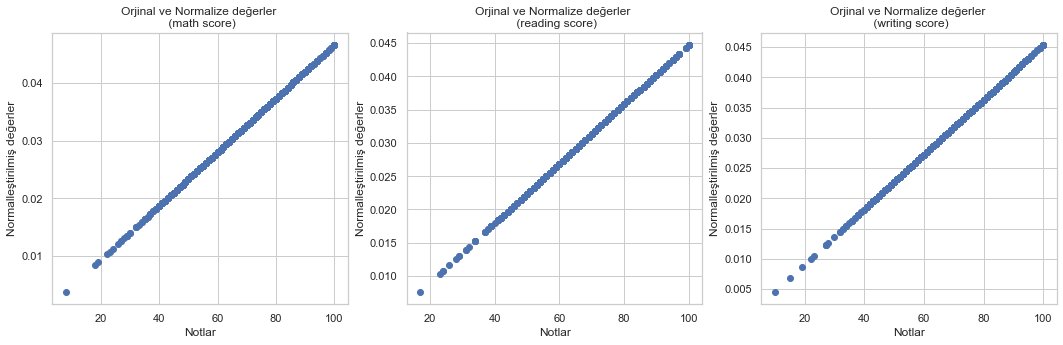

In [45]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(data[normal_ozellikler[2*i]], data[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]))
    plt.xlabel("Notlar")
    plt.ylabel("Normalleştirilmiş değerler")

plt.show()


## SOR
## bu grafikleri nasıl yorumlayabilirim? Standartlastırmaya gerek olup olmadıgını nasıl anlarım?

## ODEV 2
Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [46]:
data['ortalama_not'] = (data['math score'] + data['reading score'] + data['writing score'])/3
data['ortalama_not'].head()

0   72.66667
1   82.33333
2   92.66667
3   49.33333
4   76.33333
Name: ortalama_not, dtype: float64

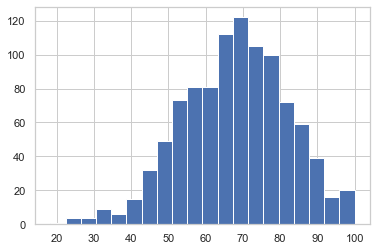

In [47]:
plt.hist(data['ortalama_not'], bins=20)
plt.show()

In [52]:


dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
jb_stats = jarque_bera(data['ortalama_not'])
norm_stats = normaltest(data['ortalama_not'])
dagilim_testleri = dagilim_testleri.append({"ozellik": 'ortalama_not',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,ortalama_not,10.93329,0.00423,10.69383,0.00476


In [54]:
#normalize edelimm

from sklearn.preprocessing import normalize

data["norm_ortalama_not"] = normalize(np.array(data["ortalama_not"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["ortalama_not","norm_ortalama_not"]


print('Minimum Değer\n-----------------',)
print(data[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(data[normal_ozellikler].max())

Minimum Değer
-----------------
ortalama_not        18.33333
norm_ortalama_not    0.00837
dtype: float64

Maksimum Değer
-----------------
ortalama_not        100.00000
norm_ortalama_not     0.04566
dtype: float64


In [55]:


dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
jb_stats = jarque_bera(data['norm_ortalama_not'])
norm_stats = normaltest(data['norm_ortalama_not'])
dagilim_testleri = dagilim_testleri.append({"ozellik": 'norm_ortalama_not',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_ortalama_not,10.93329,0.00423,10.69383,0.00476


# SOR
## p value neden değişmedi?

## ODEV 3: Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [58]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,norm_matematik,norm_okuma,norm_yazma,ortalama_not,norm_ortalama_not
0,female,group B,bachelor's degree,standard,none,72.00000,72,74,0.03356,0.03221,0.03356,72.66667,0.03318
1,female,group C,some college,standard,completed,69.00000,90,88,0.03217,0.04026,0.03991,82.33333,0.03759
2,female,group B,master's degree,standard,none,90.00000,95,93,0.04195,0.04250,0.04218,92.66667,0.04231
3,male,group A,associate's degree,free/reduced,none,47.00000,57,44,0.02191,0.02550,0.01995,49.33333,0.02252
4,male,group C,some college,standard,none,76.00000,78,75,0.03543,0.03489,0.03401,76.33333,0.03485


In [57]:
data.corr()


,math score,reading score,writing score,norm_matematik,norm_okuma,norm_yazma,ortalama_not,norm_ortalama_not
math score,1.00000,0.80973,0.79356,1.00000,0.80973,0.79356,0.91420,0.91420
reading score,0.80973,1.00000,0.95460,0.80973,1.00000,0.95460,0.96984,0.96984
writing score,0.79356,0.95460,1.00000,0.79356,0.95460,1.00000,0.96477,0.96477
norm_matematik,1.00000,0.80973,0.79356,1.00000,0.80973,0.79356,0.91420,0.91420
norm_okuma,0.80973,1.00000,0.95460,0.80973,1.00000,0.95460,0.96984,0.96984
norm_yazma,0.79356,0.95460,1.00000,0.79356,0.95460,1.00000,0.96477,0.96477
ortalama_not,0.91420,0.96984,0.96477,0.91420,0.96984,0.96477,1.00000,1.00000
norm_ortalama_not,0.91420,0.96984,0.96477,0.91420,0.96984,0.96477,1.00000,1.00000


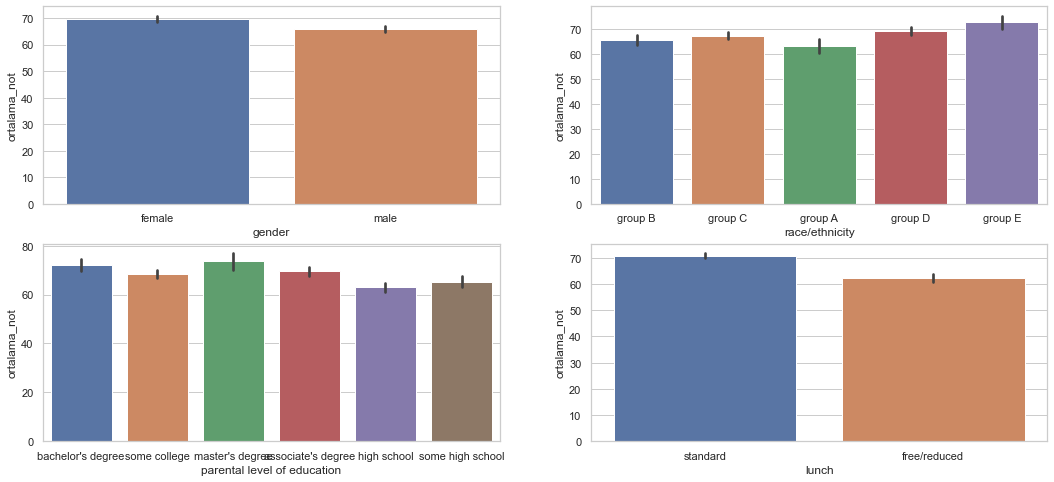

In [61]:
#kategorik değişimler için:

plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
sns.barplot(data["gender"], data["ortalama_not"])
plt.subplot(2,2,2)
sns.barplot(data["race/ethnicity"], data["ortalama_not"])
plt.subplot(2,2,3)
sns.barplot(data["parental level of education"], data["ortalama_not"])
plt.subplot(2,2,4)
sns.barplot(data["lunch"], data["ortalama_not"])

plt.show()

In [63]:
import scipy.stats as sts
ttest_cinsiyet=sts.ttest_ind(data[data["gender"]=="female"]["ortalama_not"], 
                             data[data["gender"]=="male"]["ortalama_not"])
ttest_yemek=sts.ttest_ind(data[data["lunch"]=="standard"]["ortalama_not"], 
                             data[data["lunch"]=="free/reduced"]["ortalama_not"])
ttest_kurs=sts.ttest_ind(data[data["test preparation course"]=="none"]["ortalama_not"], 
                             data[data["test preparation course"]=="completed"]["ortalama_not"])

display("CİNSİYET", ttest_cinsiyet)
display("YEMEK", ttest_yemek)
display("HAZIRLIK KURSU", ttest_kurs)

'CİNSİYET'

Ttest_indResult(statistic=4.240700482473363, pvalue=2.4351791255484407e-05)

'YEMEK'

Ttest_indResult(statistic=9.554221645742766, pvalue=9.309015705628212e-21)

'HAZIRLIK KURSU'

Ttest_indResult(statistic=-8.397252107816769, pvalue=1.5538861955646217e-16)

## SOR--burada kategorik degıskende fazla deger olan degişkenleri ne yapmalıyım?

In [65]:
# Test whether group differences are significant.
kategorik_degiskenler = data.columns[:4]
kategorik_degiskenler

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch'], dtype='object')

## burada for u kullanarak nasıl yazabilirim?